# Guided project: Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey, analyzed movie ratings data from Fandango and found that their rating rystem was dishonest. He found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, by checking in the HTML page. Most of the times, the actual rating was rounded up to the nearest half-star, whole star (in 8% of the cases) or even completely off - from 4 to 5.

Fandango's officials replied that the bias wasn't intentional, but caused by a bug in their system and promissed to fix this. The rating value isn't displayed in the HTML page anymore.

In this project, we will try to determine if there has been any change in Fandango's rating system since then, by analyzing more recent movie ratings.

In order to do that, we can compare the previous system's characteristics using [Hickey's data](https://github.com/fivethirtyeight/data/tree/master/fandango) and a more recent database collected by Dataquest with movies from [2016 and 2017](https://github.com/mircealex/Movie_ratings_2016_17)



Let's read and explore the two data sets.

In [2]:
import pandas as pd
fandango_before = pd.read_csv('fandango_score_comparison.csv')
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
fandango_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [5]:
fandango_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
fandango_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We will isolate the columns that are relevant from both datasets:
 - fandango_before: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'
 - fandango_after: 'movie', 'year', 'fandango'

In [7]:
fandango_b = fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [8]:
fandango_a = fandango_after[['movie', 'year', 'fandango']]

The population of interest for our analysis is made of all movie ratings on Fandango's website, regardless of the releasing year. 
In order to answer the question if there has been any change in the rating system, we need to sample the population at 2 different moments, before and after Hickey's analysis. 

The 2 datasets we have were sampled at the right time, one before the analysis (we called it fandango_before) and the second one after (fandango_after). 

We need to avoid sampling error and that our samples are representative, not random.

From Hickey's [article](https://github.com/fivethirtyeight/data/tree/master/fandango) we know that he used some criterion in selecting the movies:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)
- The movie must have had tickets on sale in 2015

The sample selected by [DataQuest](https://github.com/mircealex/Movie_ratings_2016_17) is also based on some criterion:
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data)

Unfortunately, both of our sampled datasets are subject to temporal trends. 
Both authors used purposive sampling/sujective sampling that served their goals, but is not useful for our research.

# Changing the Goal of our Analysis

As concluded, the samples we got, are very unlikely to be representative to the population we're trying to describe. Instead of collecting new data, we will try to change a bit the goal of our analysis. 

From trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, to determining whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 


With this new goal, we now have two populations that we want to compare:
    - Fandango's ratings for popular movies released in 2015
    - Fandango's ratings for popular movies released in 2016
    
By "popular" we'll consider Hickey's benchmark - the movie should have at least 30 fan ratings or more on Fandango's website.
We also need to make sure we isolate movies released in 2015 and 2016 in separate data sets and not include movies with other release years.

Our after dataset, doesn't include the ratings.
To check if the sample is representative, we can randomly select 10 movies from the dataset and check on the website if these have at least 30 fan ratings. 

In [9]:
fandango_a.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In April 2018 90% of these movies were popular based on our criteria.

Just to make sure, we also check that our before database only includes popular movies.

In [10]:
sum(fandango_b['Fandango_votes'] < 30)

0

# Isolating movies into 2 datasets, 2015 and 2016

In [11]:
fandango_b.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


We don't have a column for the year, but it is contained in the column 'FILM', so we shoudl extract it from there.

In [12]:
fandango_b['Year'] = fandango_b['FILM'].str[-5:-1] 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
fandango_b.head()


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Let's see the year distribution in our dataset

In [14]:
fandango_b['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

We will now create a new data set that only includes movies released in 2015. We will lose 17 lines this way.

In [15]:
fandango_2015 = fandango_b[fandango_b['Year'] == '2015'].copy()

In [16]:
fandango_2015['Year'].value_counts()


2015    129
Name: Year, dtype: int64

Let's also check the year distribution in our fandango_after data set.

In [17]:
fandango_a['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

We will have to drop 23 lines and create a new data set that only includes movies released in 2016.

In [18]:
fandango_2016 = fandango_a[fandango_a['year'] == 2016].copy()

In [19]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

We now have our data sets and we can move on to determine if there is any difference in ratings between 2015 and 2016.

# Comparing Distribution Shapes 

Let's generate a density plot for the distribution of movie ratings for ou samples.

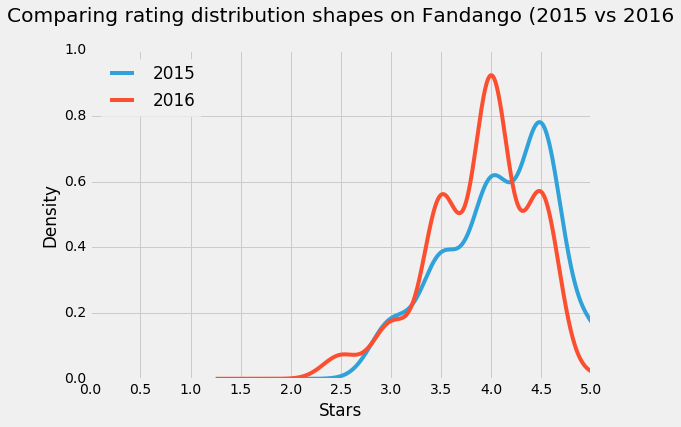

In [20]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend = True, figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend = True)

plt.title("Comparing rating distribution shapes on Fandango (2015 vs 2016", y=1.07)
plt.xlabel('Stars')
plt.xlim(0,5)

plt.xticks(arange(0,5.1,.5))
plt.show()

Some of the conclusions we can extract based on this graphic:
 - both distributions are left skewed
 - 2016 is a bit more left than 2015
 - the ratings are tending to be high, but the 2016 ratings are a bit lower than the ones in 2015

# Examining the frequency distribution tables

In [22]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() *100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The 4.5/5 ratings are significantly in a lower percentage in 2016 vs 2015. We can also see that in 2016 there are 3.1% ratings under 3 (none in 2015). The 3.5/4 ratings are in a greater percentage in 2016 than in 2015.

# Determining the direction of the difference
Compute some summary metrics: mean, median and mode

In [24]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


We'll generate a bar plot to show comparatively the mean, median and mode variation from 2015 to 2016.

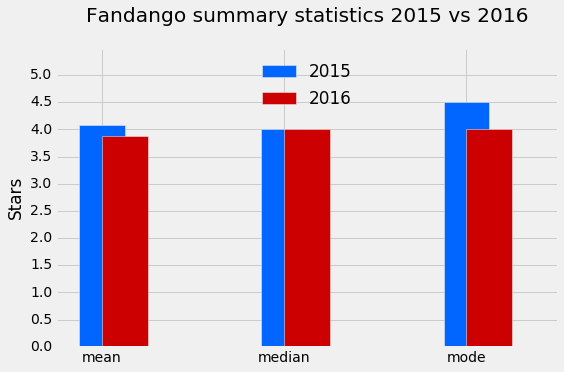

In [28]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='#0066FF', align='center', label='2015', width=.25)
summary['2016'].plot.bar(color='#CC0000', align='edge', label='2016', width=.25, rot=0, figsize=(8,5))

plt.title('Fandango summary statistics 2015 vs 2016', y=1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc = 'upper center')
plt.show()


The mean is slightly higher in 2015 than in 2016 and the mode higher by 0.5. The median is the same for both 2015 and 2016.

# Conclusions
We can say there is a slight difference in Fandango's popular movies ratings between 2015 and 2016. On average, popular movies were better rated in 2015 than in 2016.
